In [1]:
T_fields = []
with open("Topics_fields.txt","r") as f:
    for row in f:
        if row != "\n":
            #print(row.split("(")[1].replace(")",""))
            T_fields.append(row.split("(")[1].replace(")",""))

In [2]:
%store -r group_publication_titles
%store -r topic_with_value
%store -r topic_rank
%store -r norm_distance_kl
%store -r norm_distance_tau
%store -r mgp_nodes
%store -r group_head_id
%store -r filtered_groups
%store -r aggregated_distribution

In [3]:
%store -r topic_distribution_year

In [4]:
%store -r lda_model
%store -r id2word
%store -r prepare_text_for_lda

In [5]:
%store -r persistent_res_kl
%store -r anti_persistent_res_kl
%store -r persistent_res_tau
%store -r anti_persistent_res_tau

In [6]:
interval_start_year = [i[0] for i in topic_distribution_year]

In [7]:
topics = {j:"  ".join([id2word[i[0]] for i in lda_model.get_topic_terms(j)]) for j in range(25)}

In [8]:
t_fields = {t:field.replace("\n","") for t, field in zip(topics.keys(), T_fields)}

In [9]:
t_fields

{0: 'TOPOLOGY',
 1: 'NUMERICAL METHODS',
 2: 'NUMBER FIELD',
 3: 'MANIFOLD',
 4: 'MATRIX ALGEBRA',
 5: 'QUANTUM THEORY',
 6: 'GRAPH THEORY',
 7: 'SPURIOUS',
 8: 'NON-LINEAR DYNAMICS',
 9: 'STATISTICS',
 10: 'FORMAL METHODS IN COMPUTING',
 11: 'FLUID DYNAMICS',
 12: 'WAVE SCATTERING',
 13: 'FUZZY SYSTEMS',
 14: 'DIFFERENTIAL EQUATION',
 15: 'MARKOV PROCESS',
 16: 'STATISTICAL MODEL ESTIMATION',
 17: 'SPURIOUS',
 18: 'CONVEX OPTIMIZATION',
 19: 'GAME THEORY',
 20: 'STUDY OF FUNCTIONS',
 21: 'GROUP THEORY',
 22: 'MARKOV CHAIN',
 23: 'SIGNAL PROCESSING',
 24: 'FUNCTIOAL ANALYSIS'}

In [128]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
 
%matplotlib inline

In [129]:
# deviation = {j: [[t_fields[t] for t in i[0:5] if t not in [7,17]] for i in topic_rank[group_head_id.index(j)]] for j in persistent_res_kl[0:5]}
# deviation = {inx:[t[0:3] for t in topics] for inx, topics in deviation.items()}
# indexs =  {idd :i for i, idd in enumerate(group_head_id) if idd in list(deviation.keys())}
# dev_type= "least_deviation"

In [130]:
deviation = {j: [[t_fields[t] for t in i[0:5] if t not in [7,17]] for i in topic_rank[group_head_id.index(j)]] for j in anti_persistent_res_kl[0:5]}
deviation = {inx:[t[0:3] for t in topics] for inx, topics in deviation.items()}
indexs =  {idd :i for i, idd in enumerate(group_head_id) if idd in list(deviation.keys())}
dev_type= "largest_deviation"

In [131]:
#least_deviation

In [132]:
#least_deviation

In [133]:
#least_deviation[7298]

In [134]:
folder = "deviation_img"

In [135]:
#it = iter(list(deviation.keys()))

In [136]:
# try:
#     inxx=next(it)
#     print(inxx)
#     dates = interval_start_year[indexs[inxx]]
#     max_date = max(dates)
#     min_date = min(dates)
#     labels = ["\n ".join(["YEAR: "+str(date)]+i) for i, date in zip(deviation[inxx],dates)]
# except StopIteration:
#     print("done")

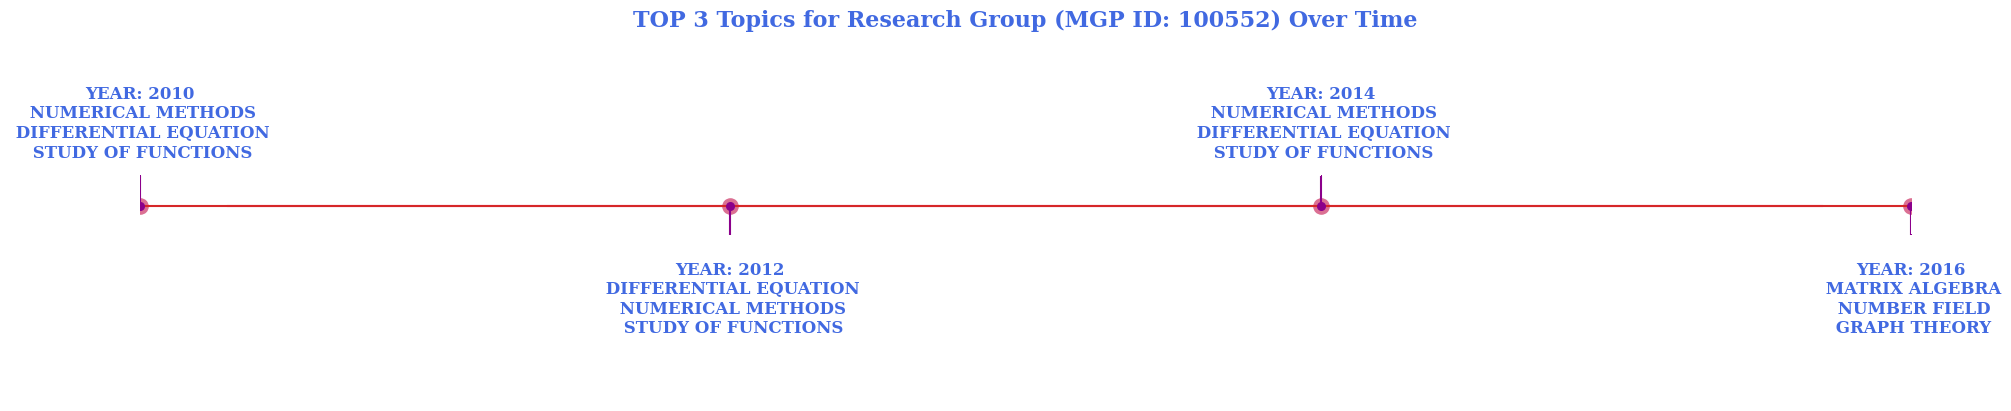

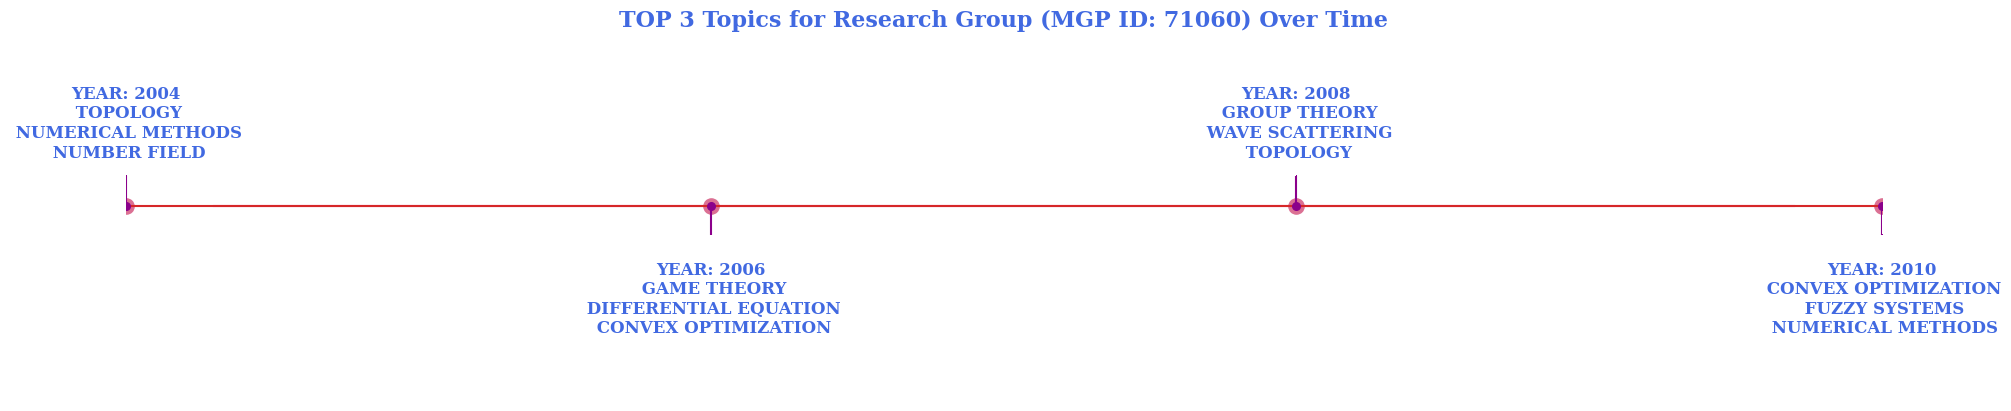

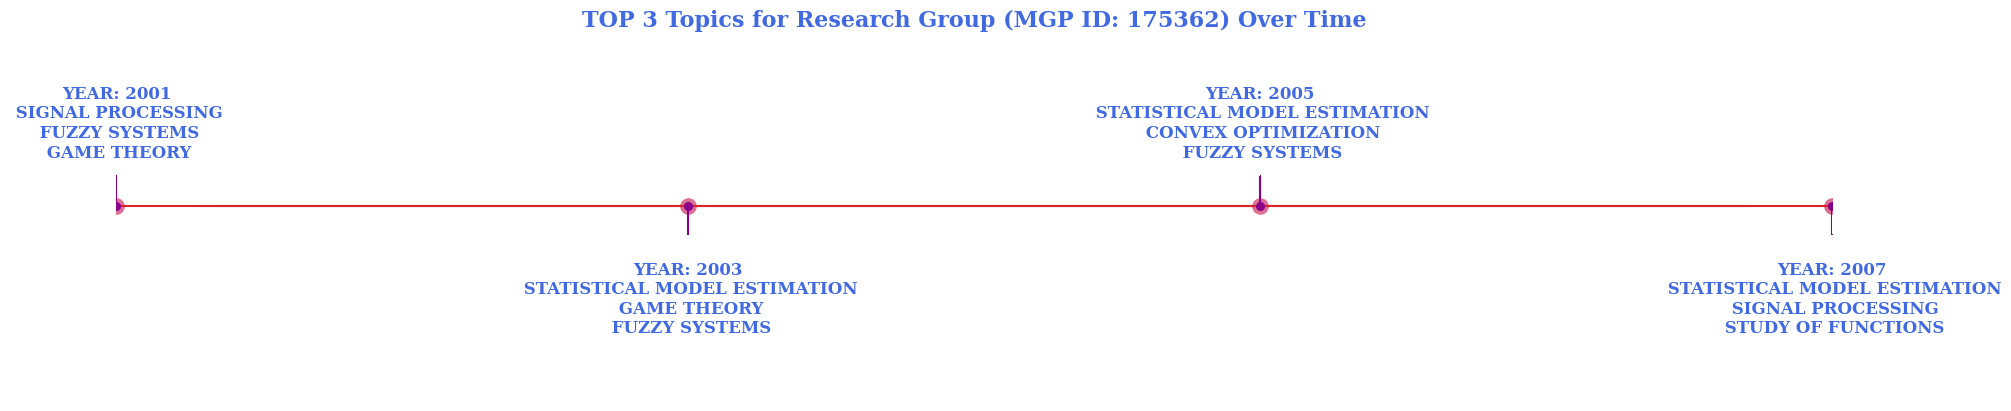

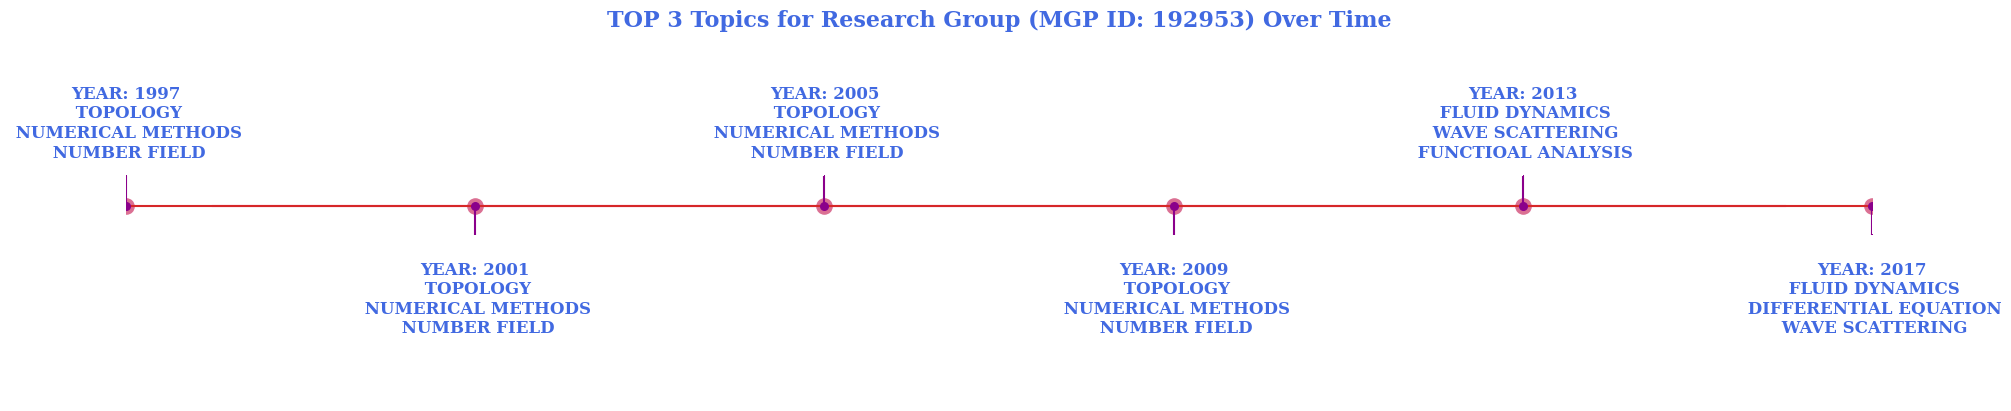

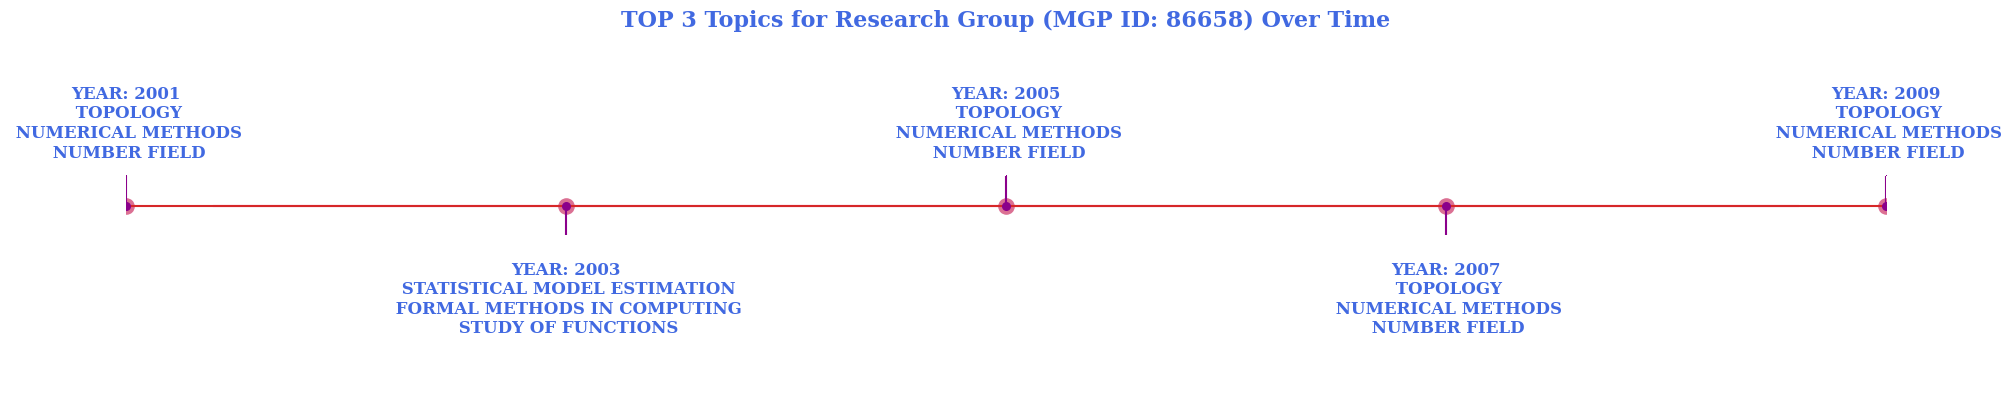

In [137]:
for inxx in deviation.keys():
    dates = interval_start_year[indexs[inxx]]
    max_date = max(dates)
    min_date = min(dates)
    labels = ["\n ".join(["YEAR: "+str(date)]+i) for i, date in zip(deviation[inxx],dates)]
    
    if len(dates) > 10:
        interval = len(dates)//5
    else:
        interval = 1
    dates= dates[::interval]
    labels= labels[::interval]
    fig, ax = plt.subplots(figsize=(20, 4), constrained_layout=True)
    _ = ax.set_ylim(-2, 1.75)
    _ = ax.set_xlim(min_date, max_date)
    _ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)

    _ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='palevioletred', zorder=2)
    _ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)


    label_offsets = np.zeros(len(dates))
    label_offsets[::2]  = 0.50
    #label_offsets[::4]  = 0.50
    label_offsets[1::2] = -1.3
    #label_offsets[1::4] = -0.9
    for i, (l, d) in enumerate(zip(labels, dates)):
        _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)


    stems = np.zeros(len(dates))
    stems[::2] = 0.3
    stems[1::2] = -0.3   
    markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
    _ = plt.setp(markerline, marker=',', color='darkmagenta')
    _ = plt.setp(stemline, color='darkmagenta')


    for spine in ["left", "top", "right", "bottom"]:
        _ = ax.spines[spine].set_visible(False)

    # hide tick labels
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])

    _ = ax.set_title(f"TOP 3 Topics for Research Group (MGP ID: {inxx}) Over Time", fontweight="bold", fontfamily='serif', fontsize=16, 
                     color='royalblue')
    plt.savefig(f"{folder}/{dev_type}_research_group_{inxx}.pdf")

In [29]:
tt = {t[0]:t[1]+" "+field.replace("\n","").lower() for t, field in zip(topics.items(), T_fields)}

In [89]:
tt = {t[0]:t[1] for t, field in zip(topics.items(), T_fields)}

In [90]:
tt

{0: 'set  theorem  map  measur  topolog  transform  properti  extens  preserv  entropi',
 1: 'method  finit  numer  equat  element  scheme  approxim  problem  iter  analysi',
 2: 'polynomi  number  function  seri  zero  sum  sequenc  field  power  formula',
 3: 'surfac  manifold  curv  space  project  invari  geometri  complex  plane  bundl',
 4: 'matrix  matric  code  rm  form  construct  symmetr  self  block  rank',
 5: 'theori  quantum  field  mr  geometri  string  classic  homotopi  dualiti  gaug',
 6: 'graph  bound  tree  number  cycl  algorithm  set  edg  connect  distanc',
 7: 'de  des  et  sur  la  les  un  une  pour  en',
 8: 'system  control  dynam  time  stabil  discret  state  linear  delay  nonlinear',
 9: 'distribut  asymptot  limit  random  statist  probabl  normal  variabl  exponenti  converg',
 10: 'comput  complex  base  logic  algorithm  extend  abstract  use  proof  parallel',
 11: 'flow  model  diffus  phase  fluid  dynam  reaction  law  simul  conserv',
 12: 'dime

In [91]:
import torch
import numpy as np
from transformers import AutoTokenizer, BertModel

In [92]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [93]:
texts = list(tt.values())

In [94]:
texts

['set  theorem  map  measur  topolog  transform  properti  extens  preserv  entropi',
 'method  finit  numer  equat  element  scheme  approxim  problem  iter  analysi',
 'polynomi  number  function  seri  zero  sum  sequenc  field  power  formula',
 'surfac  manifold  curv  space  project  invari  geometri  complex  plane  bundl',
 'matrix  matric  code  rm  form  construct  symmetr  self  block  rank',
 'theori  quantum  field  mr  geometri  string  classic  homotopi  dualiti  gaug',
 'graph  bound  tree  number  cycl  algorithm  set  edg  connect  distanc',
 'de  des  et  sur  la  les  un  une  pour  en',
 'system  control  dynam  time  stabil  discret  state  linear  delay  nonlinear',
 'distribut  asymptot  limit  random  statist  probabl  normal  variabl  exponenti  converg',
 'comput  complex  base  logic  algorithm  extend  abstract  use  proof  parallel',
 'flow  model  diffus  phase  fluid  dynam  reaction  law  simul  conserv',
 'dimension  wave  three  two  energi  one  dime

In [95]:
encoding = tokenizer.batch_encode_plus(texts,                    
    padding=True,              
    truncation=True,           
    return_tensors='pt',      
    add_special_tokens=True
)
 
input_ids = encoding['input_ids']  # Token IDs
# print input IDs
#print(f"Input ID: {input_ids}")
attention_mask = encoding['attention_mask']  # Attention mask
# print attention mask
#print(f"Attention mask: {attention_mask}")

In [96]:
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    word_embeddings = outputs.last_hidden_state  # This contains the embeddings

In [97]:
#word_embeddings.shape

In [98]:
embeddings = np.mean(word_embeddings.numpy(), axis=1)

In [99]:
#decoded_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
#print decoded text
#print(f"Decoded Text: {decoded_text}")

In [147]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=5)
X_embedded= t_sne.fit_transform(embeddings)
X_embedded.shape

(25, 2)

In [148]:
X_embedded[:,0]

array([ 101.02076  ,   -5.3482647,   65.307434 ,  158.68248  ,
       -108.33728  ,  152.82643  , -130.55179  , -230.44945  ,
        169.83067  ,   28.16312  ,  -76.26671  ,  162.39325  ,
        115.28929  ,   48.313454 ,   24.171278 ,   62.82136  ,
       -108.49197  , -255.2822   ,  -31.682882 , -114.14525  ,
        -28.35964  ,  193.32417  ,   67.44974  , -168.71568  ,
        218.49484  ], dtype=float32)

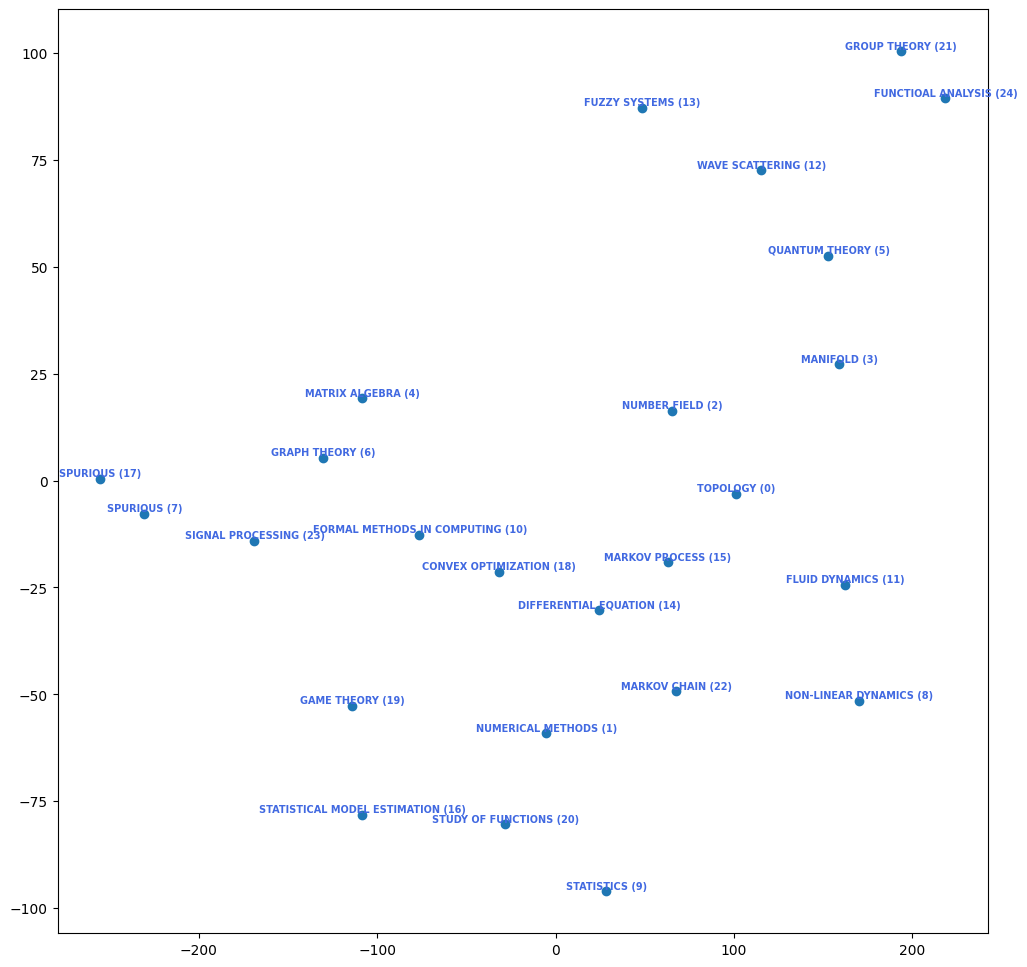

In [149]:
plt.figure(figsize=(12,12))
plt.scatter(X_embedded[:,0],X_embedded[:,1])
for i, point in enumerate(X_embedded):
        _ = plt.text(point[0]+0.2, point[1]+0.5, t_fields[i]+" "+"("+str(i)+")", ha='center', fontweight='bold', color='royalblue',fontsize=7)
plt.savefig(f"{folder}/Topics_plot1.pdf",bbox_inches="tight")

In [12]:
import pandas as pd

In [10]:
topics

{0: 'set  theorem  map  measur  topolog  transform  properti  extens  preserv  entropi',
 1: 'method  finit  numer  equat  element  scheme  approxim  problem  iter  analysi',
 2: 'polynomi  number  function  seri  zero  sum  sequenc  field  power  formula',
 3: 'surfac  manifold  curv  space  project  invari  geometri  complex  plane  bundl',
 4: 'matrix  matric  code  rm  form  construct  symmetr  self  block  rank',
 5: 'theori  quantum  field  mr  geometri  string  classic  homotopi  dualiti  gaug',
 6: 'graph  bound  tree  number  cycl  algorithm  set  edg  connect  distanc',
 7: 'de  des  et  sur  la  les  un  une  pour  en',
 8: 'system  control  dynam  time  stabil  discret  state  linear  delay  nonlinear',
 9: 'distribut  asymptot  limit  random  statist  probabl  normal  variabl  exponenti  converg',
 10: 'comput  complex  base  logic  algorithm  extend  abstract  use  proof  parallel',
 11: 'flow  model  diffus  phase  fluid  dynam  reaction  law  simul  conserv',
 12: 'dime

In [16]:
t_fields

{0: 'TOPOLOGY',
 1: 'NUMERICAL METHODS',
 2: 'NUMBER FIELD',
 3: 'MANIFOLD',
 4: 'MATRIX ALGEBRA',
 5: 'QUANTUM THEORY',
 6: 'GRAPH THEORY',
 7: 'SPURIOUS',
 8: 'NON-LINEAR DYNAMICS',
 9: 'STATISTICS',
 10: 'FORMAL METHODS IN COMPUTING',
 11: 'FLUID DYNAMICS',
 12: 'WAVE SCATTERING',
 13: 'FUZZY SYSTEMS',
 14: 'DIFFERENTIAL EQUATION',
 15: 'MARKOV PROCESS',
 16: 'STATISTICAL MODEL ESTIMATION',
 17: 'SPURIOUS',
 18: 'CONVEX OPTIMIZATION',
 19: 'GAME THEORY',
 20: 'STUDY OF FUNCTIONS',
 21: 'GROUP THEORY',
 22: 'MARKOV CHAIN',
 23: 'SIGNAL PROCESSING',
 24: 'FUNCTIOAL ANALYSIS'}

In [17]:
dict = {'Topic No.': topics.keys(), 'Topic Terms': topics.values(), 'Topic Name': t_fields.values()} 

In [18]:
df = pd.DataFrame(dict)

In [22]:
pd.set_option('max_colwidth', 400)

In [23]:
df

,Topic No.,Topic Terms,Topic Name
0,0,set theorem map measur topolog transform properti extens preserv entropi,TOPOLOGY
1,1,method finit numer equat element scheme approxim problem iter analysi,NUMERICAL METHODS
2,2,polynomi number function seri zero sum sequenc field power formula,NUMBER FIELD
3,3,surfac manifold curv space project invari geometri complex plane bundl,MANIFOLD
4,4,matrix matric code rm form construct symmetr self block rank,MATRIX ALGEBRA
5,5,theori quantum field mr geometri string classic homotopi dualiti gaug,QUANTUM THEORY
6,6,graph bound tree number cycl algorithm set edg connect distanc,GRAPH THEORY
7,7,de des et sur la les un une pour en,SPURIOUS
8,8,system control dynam time stabil discret state linear delay nonlinear,NON-LINEAR DYNAMICS
9,9,distribut asymptot limit random statist probabl normal variabl exponenti converg,STATISTICS


In [25]:
print(df.to_latex(index=False))

\begin{tabular}{rll}
\toprule
 Topic No. &                                                                               Topic Terms &                   Topic Name \\
\midrule
         0 &         set  theorem  map  measur  topolog  transform  properti  extens  preserv  entropi &                     TOPOLOGY \\
         1 &            method  finit  numer  equat  element  scheme  approxim  problem  iter  analysi &            NUMERICAL METHODS \\
         2 &               polynomi  number  function  seri  zero  sum  sequenc  field  power  formula &                 NUMBER FIELD \\
         3 &           surfac  manifold  curv  space  project  invari  geometri  complex  plane  bundl &                     MANIFOLD \\
         4 &                     matrix  matric  code  rm  form  construct  symmetr  self  block  rank &               MATRIX ALGEBRA \\
         5 &            theori  quantum  field  mr  geometri  string  classic  homotopi  dualiti  gaug &               QUANTUM THEORY \\
  

/tmp/ipykernel_18422/1842088038.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))
